In [3]:
# Automatic Speech Recognition WS-17-18
# Exercise 4, Task 4.2

# If you need a 'inf', you can use float("inf")
# which behaves as a infinite number w.r.t. addition.

# Please make use of the functions and the variables
# provided in this block when you write your answer codes.

import matplotlib.pyplot as plt
import numpy as np
import math

# Utilities
def Read(filename):
    data = []
    # Read function
    with open(filename) as f:
        data_str = f.readlines()
        for i in range(0, len(data_str)):
            data.append(float(data_str[i].rstrip()))
        return data
    
def Init():
    # Initialize the computation counter by 0.
    global counter
    counter = 0
    # Initialize the table of size TxS by -1.
    global D
    D = -np.ones([T,S])
    print("Initialization done.")

def dist(x,y):  # l1 distance.
    global counter
    # We count the number of distance computation.
    counter = counter + 1
    return np.abs(x-y)


Let's see what the data points look like.


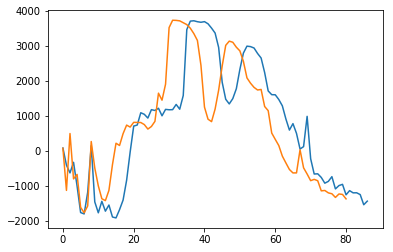

Initialization done.


In [35]:
# Introduction: Read the data
# This is another helper code block which introduces
# the name of variables to be used in your solution.

# The tasks start at the next block.

# Download the data from L2P and put the paths here:
# Small data for quick test:
small_test_data = "/home/anya/Documents/asr/assignment_4/small_test.dat"
small_ref_data = "/home/anya/Documents/asr/assignment_4/small_ref.dat"
small_test = Read(small_test_data)
small_ref = Read(small_ref_data)
# Full data:
test_data = "/home/anya/Documents/asr/assignment_4/test.dat"
ref_data = "/home/anya/Documents/asr/assignment_4/ref.dat"
full_test = Read(test_data)
full_ref = Read(ref_data)

test = full_test
ref = full_ref
# Please use the variable names 'test' and 'ref' in your
# answer code. Then, you can run test with the small data
# by adding the following lines before your code:
#test = small_test
#ref = small_ref

# Visualize the data
print("Let's see what the data points look like.")
plt.plot(test)
plt.plot(ref)
plt.show()

# Define some global variables
T = len(test)
S = len(ref)

maxJump = 2
jumpPen = [2, 0, 2] # time distortion penalties
# Define containers
D = -np.ones([T,S])
counter = 0
# Initialize the table
Init()


In [49]:
#   Task 4.2 (a)

# For this task, you can first use the small data set.
test = small_test
ref = small_ref
T = len(test)
S = len(ref)

def Recursive():
    print("Task 4.2 (a)")
    # TODO: Your task is to implement a helper
    # function "_recursive" below
    return _recursive(T-1,S-1)

def _recursive(t,s):
    # You code here.
    if (s < 0 or t < 0):
        return 0
    elif (s == 0):
        pSum = 0
        for point in range(0,t):
            pSum += (dist(ref[0],test[point]) + 2)
        return pSum
    else:
        return (dist(ref[s], test[t]) + min(_recursive(t-1, s-1) + 0,
                                            _recursive(t-1, s-2) + 2,
                                            _recursive(t-1, s) + 2))

# Here you can test on the small data set.
print("[Small data] Global distance is", Recursive())
print("    which should be 3101.0")
print("[Small data] Number of computation is", counter)
print("    which should be 19238")

# You can also try to run a test on the full data,
# but it should take forever to finish.


Task 4.2 (a)
[Small data] Global distance is 2674.0
    which should be 3101.0
[Small data] Number of computation is 133755
    which should be 19238


In [11]:
#   Task 4.2 (b)

# For this task, you can try both the small
# and the full data.
test = full_test
ref = full_ref
T = len(test)
S = len(ref)

def Memoization():
    print("Task 4.2 (b)")
    # TODO: Your task is to implement a helper
    # function "_memoize" below
    return _memoize(T-1, S-1)

def _memoize(t, s):
    # Your code here.
    return 0 # Change the return value.


Init()
print("Global distance we get is", Memoization())
print("    which should be 14925.0")
print("Number of computation of our code is", counter)
print("    which should be 5407")

# You can also test on the small data to compare the number
# of computation with your code in 4.2.(a), then the number of
# computation should be 75.

Initialization done.
Task 4.2 (b)
Global distance we get is 0
    which should be 14925.0
Number of computation of our code is 0
    which should be 5407


In [ ]:
#   Task 4.2 (c)

# For this task, you can try both the small
# and the full data.
test = full_test
ref = full_ref
T = len(test)
S = len(ref)

def Iterative():
    print("Code for Task 4.2 (c)")
    return _iterative()

def _iterative():
    # Your code here.
    return 0  # Change the return value.

Init()
print("Global distance is", Iterative())
print("    which should be 14925.0")
print("Number of computation is", counter)
print("    which should be equal to 6967 or better.")
# You can also test on the small data to compare the number
# of computation with your code in 4.2.(a), then the number of
# computation should be 91 or better.

In [ ]:
# End of the exercise 4.2